In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# one hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

from pygam import LinearGAM, s, f, te

# ignore warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# MD with the stock proce D+1 for regression

without groups

In [16]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,13):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,13):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

regression_D = 'D+1'

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', regression_D]
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)
df_MD.head()

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,company_name,Group,ticker,file_name,date,WA_sentiment,D+1
0,-0.366516,-0.215699,-0.323935,-0.353454,-0.238214,-0.398740,-0.352139,-0.176507,-0.426750,-0.351793,-0.174867,-0.232269,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.000392,0.013897
1,-0.333370,-0.103071,-0.310246,-0.335709,-0.221509,-0.366200,-0.364834,-0.171150,-0.428275,-0.335058,-0.175786,-0.140922,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.000765,-0.054693
2,-0.369740,-0.496670,-0.354032,-0.354229,-0.238909,-0.436370,-0.412659,-0.183664,-0.463112,-0.365942,-0.176462,-0.328318,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,-0.000433,-0.076056
3,-0.364785,-0.210485,-0.329645,-0.353400,-0.235392,-0.403696,-0.372259,-0.175710,-0.429332,-0.341572,-0.174647,-0.265650,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.000336,-0.076056
4,-0.360472,0.356555,-0.262107,-0.337793,-0.220744,-0.333404,-0.304325,-0.176904,-0.409564,-0.285219,-0.175293,-0.279444,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.001669,0.015734


In [20]:
def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, regression_D)
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:12]
Y = df_MD_same[regression_D]

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+s(11)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     76.3155
Link Function:                     IdentityLink Log Likelihood:                              -1445059.6944
Number of Samples:                          948 AIC:                                          2890274.0198
                                                AICc:                                         2890287.9444
                                                GCV:                                                0.0004
                                                Scale:                                              0.0003
                                                Pseudo R-Squared:                                   0.1908
Feature Function                  Lam

With Groups

In [31]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,13):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,13):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

regression_D = 'D+1'

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', regression_D]
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, regression_D)
df_MD_same['Group'] = labelencoder.fit_transform(df_MD_same['Group'])
df_MD_same = df_MD_same.drop(['company_name'], axis=1)

X = df_MD_same.iloc[:,0:13].values.tolist()
Y = df_MD_same[regression_D]

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+s(11)+f(12)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     84.6141
Link Function:                     IdentityLink Log Likelihood:                              -1448984.2247
Number of Samples:                          948 AIC:                                          2898139.6776
                                                AICc:                                          2898156.895
                                                GCV:                                                0.0004
                                                Scale:                                              0.0003
                                                Pseudo R-Squared:                                   0.2082
Feature Function                  Lam

In [33]:
# df_MD_interp = pd.read_csv('./regression_df_input/MD_model_df.csv')
# def same_direction(df_MD, day_type):
#     df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
#     return df_MD_same

# # apply the same_direction function to the dataframe
# df_MD_interp_same = same_direction(df_MD, 'D-15')
# # sort the value by df_MD_interp_same["sentiment_topic_2"]
# df_MD_interp_same_tp2 = df_MD_interp_same.sort_values(by=['sentiment_topic_2'], ascending=False)
# df_MD_interp_same_tp2.head(20)
# df_MD_interp_same_tp2.tail(10)

<Figure size 432x288 with 0 Axes>

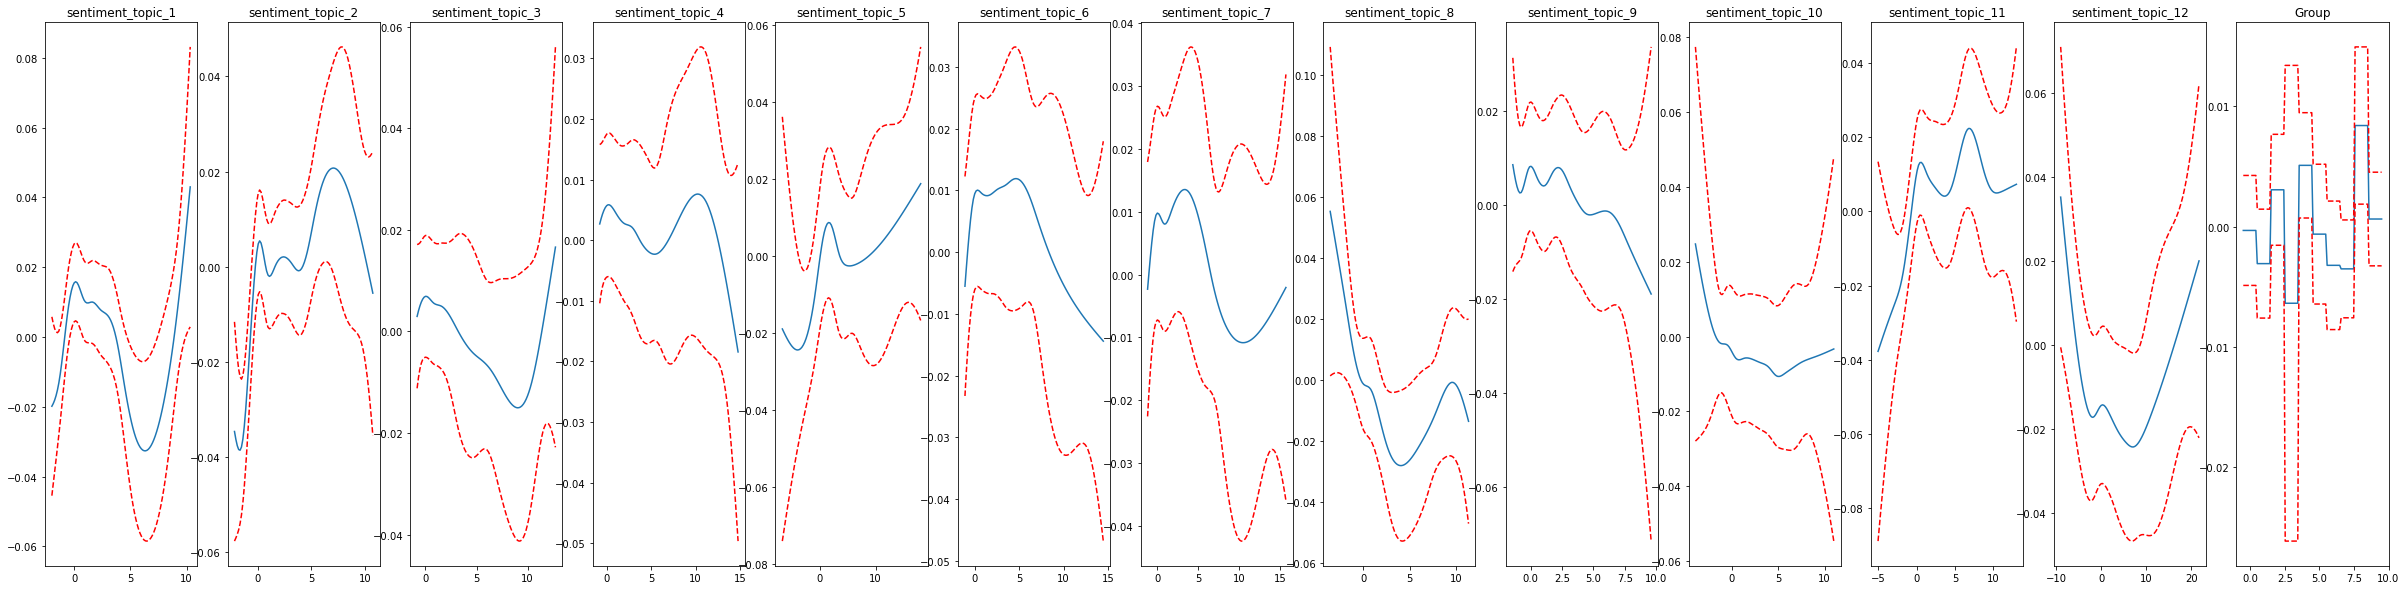

In [34]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,13, figsize=(42,10))

titles = df_MD_same.iloc[:,0:13].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

# QA with the stock proce D-1 for regression

In [37]:
df_QA = pd.read_csv('./regression_df_input/QA_model_df.csv')
df_QA['date'] = df_QA['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,13):
    df_QA['sentiment_'+'topic_'+str(i)] = df_QA['topic_'+str(i)]*df_QA['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,13):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_QA_standard = df_QA[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_QA_standard)
df_QA_scale = scaler.transform(df_QA_standard)
# append the scaled data to the original dataframe
df_QA_scale = pd.DataFrame(df_QA_scale, columns=sentiment_topic_columns)
df_QA_scale.index = df_QA_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-1']
df_QA = pd.concat([df_QA_scale, df_QA[other_columns]], axis=1)
df_QA.head()

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,company_name,Group,ticker,file_name,date,WA_sentiment,D-1
0,-0.167730,0.019787,-0.281408,-0.283960,-0.485202,-0.445604,-0.447948,-0.350277,-0.552169,-0.611032,-0.512319,-0.223609,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.000826,-0.031030
1,-0.183931,0.032005,-0.261010,-0.344280,-0.408509,-0.371341,-0.338359,-0.310989,-0.479819,-0.603915,-0.513372,-0.443859,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.000971,-0.118567
2,-0.165518,0.007659,-0.278937,-0.366978,-0.527287,-0.368014,-0.222948,-0.308227,0.447358,-0.536048,-0.489224,-0.441181,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.001851,-0.256077
3,-0.184375,0.103198,-0.275238,-0.318537,-0.415641,-0.519831,-0.421958,-0.206422,-0.471131,-0.617284,-0.477986,-0.068008,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.001353,0.100000
4,-0.584241,-18.584940,-0.997920,-1.067497,-1.703358,-1.568034,-1.605298,-1.051459,-1.768937,-1.735185,-1.633640,-1.202315,Admiral Group,Motor/Personal,ADM.L,20130306_Admiral_Group_PLC-_Earnings_Call_2013...,2013-03-06,-0.046780,0.052881


without groups

In [41]:
df_QA_same = same_direction(df_QA, 'D-1')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_QA_same.iloc[:,0:12]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+s(11)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     55.5613
Link Function:                     IdentityLink Log Likelihood:                               -596405.0702
Number of Samples:                          716 AIC:                                           1192923.263
                                                AICc:                                         1192933.1522
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.1453
Feature Function                  Lam

with groups

In [42]:
df_QA_same = same_direction(df_QA, 'D-1')
df_QA_same['Group'] = labelencoder.fit_transform(df_QA_same['Group'])
df_QA_same = df_QA_same.drop(['company_name'], axis=1)

X = df_QA_same.iloc[:,0:13]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+s(11)+f(12)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     64.0023
Link Function:                     IdentityLink Log Likelihood:                               -608551.8945
Number of Samples:                          716 AIC:                                          1217233.7936
                                                AICc:                                         1217246.9946
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.1836
Feature Function                  Lam

<Figure size 432x288 with 0 Axes>

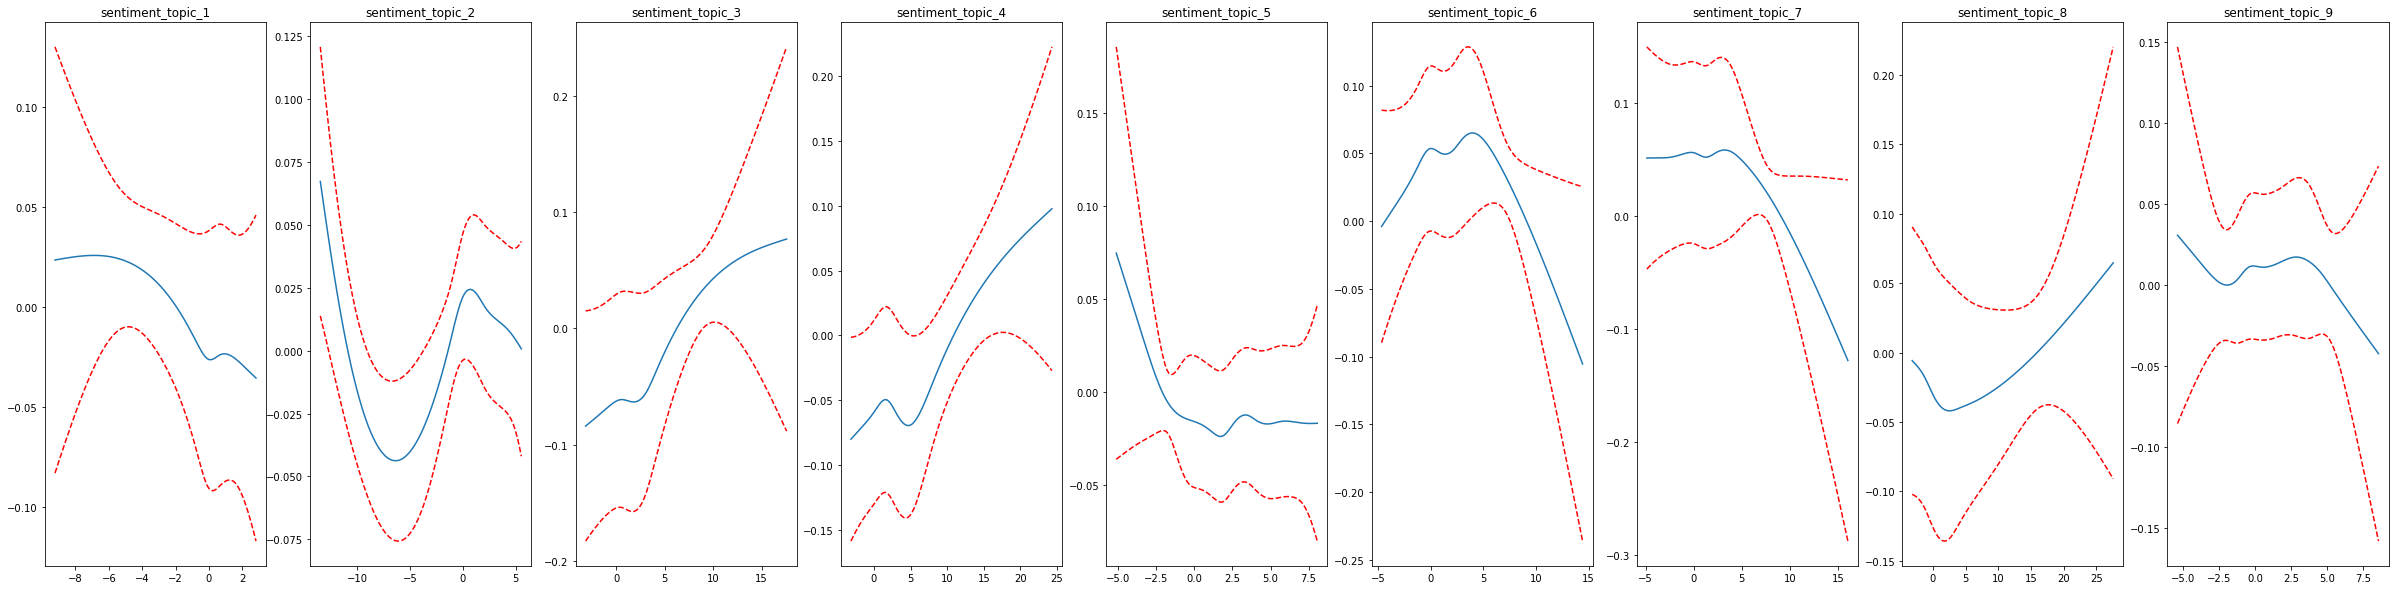

In [43]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,9, figsize=(42,10))

titles = df_QA_same.iloc[:,0:9].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

In [44]:
# # # df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# # # apply the same_direction function to the dataframe
# # df_QA_interp_same = same_direction(df_QA, 'D-1')
# # # sort the value 
# # df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
# # df_MD_interp_same_tp5.head(10)

# # df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# # apply the same_direction function to the dataframe
# df_QA_interp_same = same_direction(df_QA, 'D-1')
# # sort the value 
# df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
# df_MD_interp_same_tp5.tail(10)